In [39]:
# basic imports
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mpl
# ML Algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from catboost import CatBoostRegressor
import warnings

In [41]:
df = pd.read_csv("data/stud.csv")
df.head(6)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78


In [42]:
x = df.drop(columns = "math_score", axis = 1)
x

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [43]:
y = df["math_score"]
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [44]:
numerical_cols = x.select_dtypes(exclude="object").columns
catgorical_cols = x.select_dtypes(include="object").columns
numerical_cols

Index(['reading_score', 'writing_score'], dtype='object')

In [45]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [46]:
num_transform = StandardScaler()
cat_transform = OneHotEncoder()
preprocessor = ColumnTransformer(
    [
    ("StandardScaler", num_transform, numerical_cols),
    ("OneHotEncoder", cat_transform, catgorical_cols),
    ]
)

In [47]:
x = preprocessor.fit_transform(x)

In [48]:
x.shape

(1000, 19)

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [53]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2Score = r2_score(true, predicted)
    return mae, rmse, r2Score

In [57]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

models_list = []
r2_score_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)
    y_train_predict = model.predict(x_train)
    y_test_predict = model.predict(x_test)
    mae_predi_train, rmse_predi_train, r2S_predi_train = evaluate_model(y_train, y_train_predict)
    mae_predi_test, rmse_predi_test, r2S_predi_test = evaluate_model(y_test, y_test_predict)

    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(rmse_predi_train))
    print("- Mean Absolute Error: {:.4f}".format(mae_predi_train))
    print("- R2 Score: {:.4f}".format(r2S_predi_train))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(rmse_predi_test))
    print("- Mean Absolute Error: {:.4f}".format(mae_predi_test))
    print("- R2 Score: {:.4f}".format(r2S_predi_test))
    r2_score_list.append(r2S_predi_test)
    
    print('='*35)
    print('\n')



Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7131
- Mean Absolute Error: 4.5177
- R2 Score: 0.8552
-----------------------

In [62]:
pd.DataFrame(list(zip(models_list, r2_score_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.852405
6,CatBoosting Regressor,0.851632
7,AdaBoost Regressor,0.850553
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783589
4,Decision Tree,0.722711


In [63]:
linear_model = LinearRegression()
linear_model = linear_model.fit(x_train, y_train)
y_predict = linear_model.predict(x_test)
r2_score_linear = r2_score(y_test, y_predict) * 100

In [69]:
r2_score_linear
print("Accuracy of the model is %.5f" %r2_score_linear)

Accuracy of the model is 88.04333


Text(0, 0.5, 'Predicted')

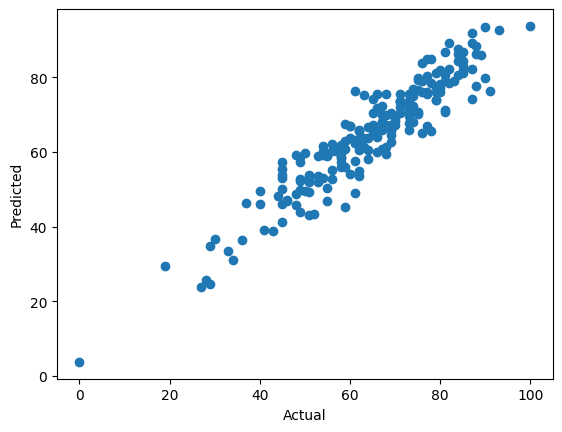

In [70]:
mpl.scatter(y_test, y_predict)
mpl.xlabel("Actual")
mpl.ylabel("Predicted")

<Axes: xlabel='math_score'>

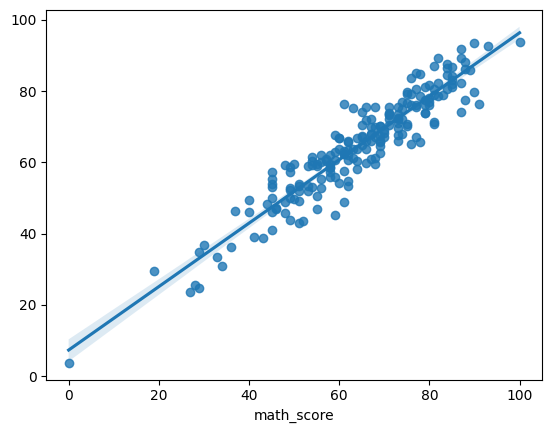

In [71]:
sb.regplot(x = y_test, y = y_predict)

In [72]:
pd.DataFrame({"actual": y_test, "predicted": y_predict, "difference": y_test-y_predict})

,actual,predicted,difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
